In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sample = pd.read_csv("Outputs/1E2Mu/CSV/Grid_MHc160_MA155_exact_1D.csv")
index_1D = ['signal', 'fake', 'conv', 'ttX', 'VV', 'rare', 'window', 'metric']
index_3D = ['signal', 'fake', 'conv', 'ttX', 'VV', 'rare', 'f_cut', 't_cut', 'm_cut', 'metric']
#sample = pd.read_csv("Outputs/1E2Mu/CSV/Grid_MHc160_MA75_3D.csv")[index_3D]
sample

,Unnamed: 0,signal,fake,conv,ttX,VV,rare,window,metric
0,0,62.629972,3.409074,0.0,1.679190,0.279960,0.0,4.4,15.090724
1,1,0.746642,1.684172,0.0,0.262484,0.191035,0.0,0.0,0.000000


In [3]:
mass_points = ['MHc70_MA15', 'MHc70_MA40', 'MHc70_MA65',
               'MHc100_MA15', 'MHc100_MA25', 'MHc100_MA60', 'MHc100_MA95',
               'MHc130_MA15', 'MHc130_MA45', 'MHc130_MA55', 'MHc130_MA90', 'MHc130_MA125',
               'MHc160_MA15', 'MHc160_MA45', 'MHc160_MA75', 'MHc160_MA85', 'MHc160_MA120', 'MHc160_MA155']

In [6]:
metrics_1D = []
metrics_3D = []
channel = "3Mu"
bkgs = ['fake', 'conv', 'ttX', 'VV', 'rare']
index_1D = ['signal', 'fake', 'conv', 'ttX', 'VV', 'rare', 'window', 'metric']
index_3D = ['signal', 'fake', 'conv', 'ttX', 'VV', 'rare', 'f_cut', 't_cut', 'm_cut', 'metric']
for mass_point in mass_points:
    sample_1D = pd.read_csv(f"Outputs/{channel}/CSV/Grid_{mass_point}_exact_1D.csv")[index_1D]
    sample_3D = pd.read_csv(f"Outputs/{channel}/CSV/Grid_{mass_point}_exact_3D.csv")[index_3D]
    
    metrics_1D.append(sample_1D.loc[0, 'metric'])
    metrics_3D.append(sample_3D.loc[0, 'metric'])
metrics_1D = np.array(metrics_1D)
metrics_3D = np.array(metrics_3D)
improvements = metrics_3D / metrics_1D
print(improvements)

[1.2282904  1.4140722  1.71931248 1.68366877 1.56772283 1.44486986
 1.49153574 1.26951124 1.93000491 1.37045026 1.51452455 1.31784334
 1.16123764 1.49291254 1.35158945 1.24827931 1.20681929 1.34804513]


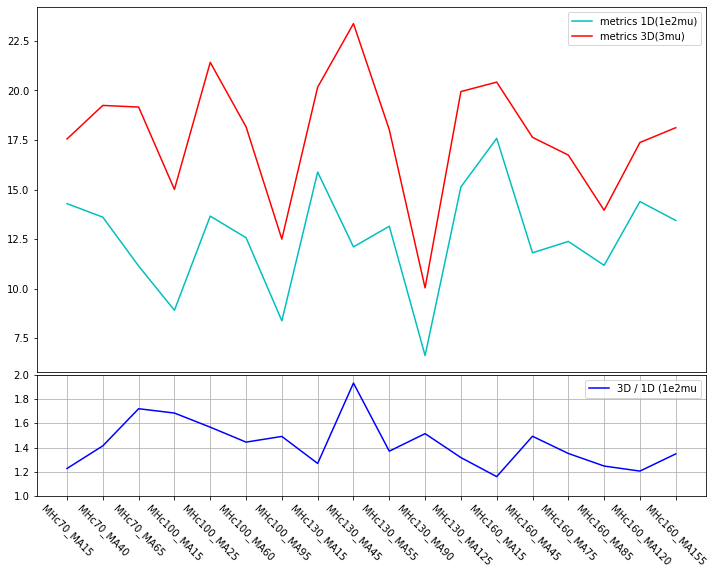

In [7]:
from matplotlib import gridspec
plt.figure(figsize=(12, 9))
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[3, 1], width_ratios=[1])
ax0 = plt.subplot(gs[0])
plt.plot(mass_points, metrics_1D, 'c', label="metrics 1D(1e2mu)")
plt.plot(mass_points, metrics_3D, 'r', label='metrics 3D(3mu)')
plt.gca().xaxis.set_visible(False)
plt.legend(loc='best')
#plt.grid(True)

ax2 = plt.subplot(gs[1])
plt.plot(mass_points, improvements, 'b', label="3D / 1D (1e2mu")
plt.xticks(rotation=-45)
plt.yticks([1, 1.2, 1.4, 1.6, 1.8, 2])
plt.legend(loc='best')
plt.grid(True)

plt.subplots_adjust(wspace=0, hspace=0.01)

plt.show()